# Monitor the Training Progress

Here, we only visualise the Root Mean Squared Error (RMSE) of force on the training dataset to see if the training is 'converged'. In practice, we compare the RMSEs on the trainset and the validation set to see if the model is overfitted.

- In the first few iterations, use `dp train ./input.json` to train from the scratch.
- Active learning iterations, use `dp train ./input.json -f YOUR_FROZEN_MODEL_PATH` to initialise the model with previous trained parameters, and also with fewer training steps (stop_batch/numb_steps). (if you would like to accelerate the training or with limited GPU resources.)
- Final production training, use `dp train ./input.json` to train from the scratch and with larger training steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The names of each column of file `lcurve.out` are
step      rmse_val    rmse_trn    rmse_e_val  rmse_e_trn    rmse_f_val  rmse_f_trn         lr

In [2]:
def plot_lcurve(curve_fpath):
    with open(curve_fpath, "r") as fopen:
        lines = fopen.readlines()
    step = np.array([l.split()[0] for l in lines[1:]], dtype=np.int32)
    rmse_f_trn = np.array([l.split()[5] for l in lines[1:]], dtype=np.float32)
    plt.title("lcurve.out")
    plt.xlabel("step")
    plt.ylabel("rmse_f_trn [eV/Å]")

    plt.yscale("log")

    plt.plot(step, rmse_f_trn)
    plt.plot(step, [0.2]*len(step), "--") # 0.2 eV/Å, GOOD
    plt.plot(step, [0.1]*len(step), "--") # 0.1 eV/Å, GREAT
    
    return

## Iteration 1 (Start from the Scratch)

Train with 200,000 batches (numb_steps)

dp train ./input.json

In [3]:
curve_fpath = "./assets/lcurve_200k.out"

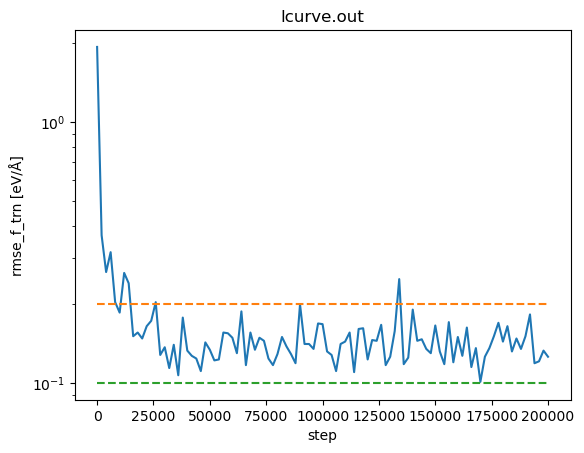

In [4]:
plot_lcurve(curve_fpath)

In [5]:
curve_fpath = "./assets/lcurve_100k.out"

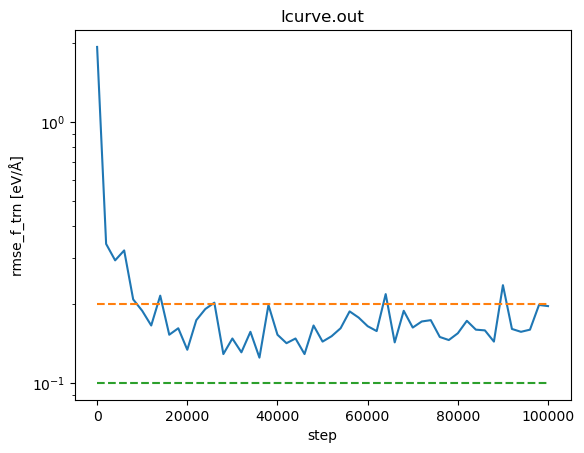

In [6]:
plot_lcurve(curve_fpath)

## Iteration 2 (Active Learning)

dp train ./input.json -f YOUR_FROZEN_MODEL_PATH

In [7]:
curve_fpath = "./assets/lcurve_iter2_100k.out"

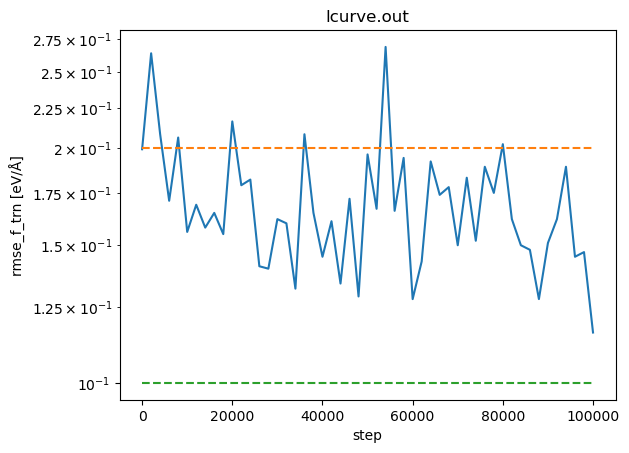

In [8]:
plot_lcurve(curve_fpath)

In [9]:
curve_fpath = "./assets/lcurve_iter3_100k.out"

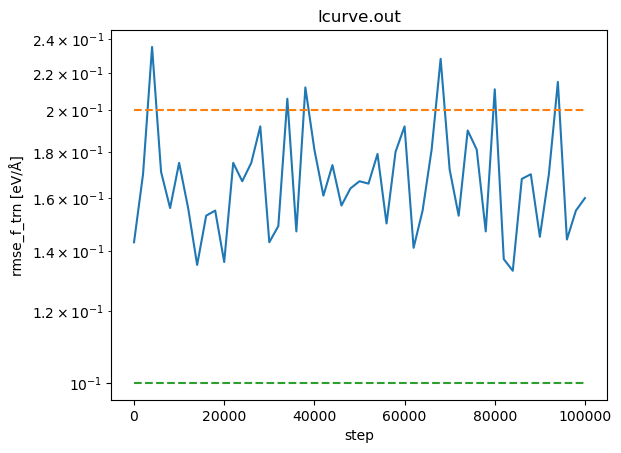

In [10]:
plot_lcurve(curve_fpath)